<a href="https://colab.research.google.com/github/CaioLSouza/my_portfolio_en/blob/main/Credit_card_fraud_detection_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection


One of the most common and important financial problems that affect the financial world is credit card fraud. In the United States, for example, there were 130,927 reported cases of credit card fraud in 2018. In addition, this number tends to increase as society begins to use less cash and more credit cards, especially for online purchases. Therefore, it is clear that this problem entails great financial losses, either for banks or for consumers. 

Thus, it is clear that financial institutions seek ways to minimize these losses. In general, this is done with automated systems that are capable of detecting the occurrence of these frauds as soon as they happen. Among these tools, machine learning methods are being widely used by credit card companies and financial institutions. They show a great relative performance because they are able to identify complex patterns between data and deal with a huge amount of data, something essential in the era of the so called "*big data*".
Therefore, the aim of this project is to use machine learning methods to detect the  of credit card fraud.

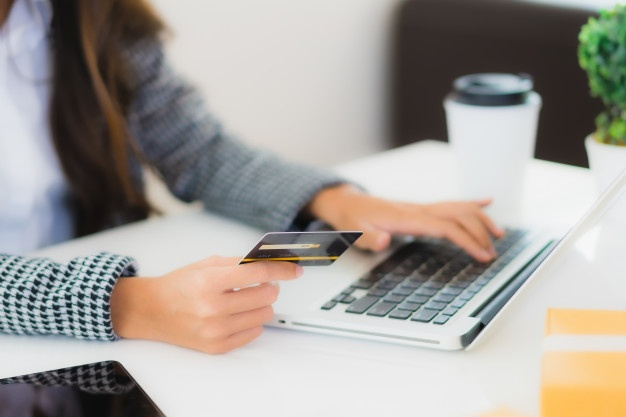

## Setting the problem and objectives

The dataset used was made available by an European credit card company. It contains nearly 290,000 transactions, of which only 492 were fraudulent. In addition, it contains 31 informative features, one of which informs whether the transaction was fraudulent or legitimate.

The general objective will be to classify, based on the information provided by these features, whether a certain credit card operation is or is not fraudulent. It is, therefore, a typical supervised machine learning problem for classification.

Thus, our main purpose is to detect as many cases as possible where fraud has occurred.

## Importing libraries

In [ ]:
# data visualization and manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style()
%matplotlib inline

# data standartization
from sklearn.preprocessing import StandardScaler

# performance metrics 
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

# validation and grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# train and test set split
from sklearn.model_selection import train_test_split

## Data collection

In the dataset that will be used almost all variables were hidden for private reasons e all of them are already standardized and there are no missing values.

In addition, the *Principal Component Analysis* (PCA) method was used to reduce the dimensionality of the data. In this context, this method allows the least informative variables available to be discarded, leaving only those that are most important for predicting the target variable. Therefore, in this specific dataset, 27 of these variables were selected as the most informative and, given that, the variable selection process has already been performed and will not be done in this analysis.

In short, these aspects restrict the data exploration and pre-processing step to be treated, and the main focus will be the construction of the machine learning model itself.

Given these considerations, we can now actually collect the dataset (available in ``csv`` format in this [link](https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1) and turn it into a pandas *dataframe*.

In [ ]:
# data import
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# transforming the data into a pandas dataframe
df = pd.read_csv(file_path)

## Variables dictionary

As already explained, the 28 features names are hidden for privacy protection, and are denoted by $[V1, V2, V3, \dots, V28]$. Only three of 31 variables are not hidden: 

* ``V1`` to ``V28``: hidden variables.

* ``Time``: the instant of time when a transaction was performed. The data take into account trades within a two days span. 

* ``Amount``: amount of money of each transaction

* ``Class``: classificação da operação em fraude ou não. Se igual a 0, a operação foi legítima. Se igual a 1, foi fraudulenta. Essa é, portanto, a variável resposta do modelo.

transaction classification, i.e., whether it is fraudulent or not. If equals to 0, then there was no fraud. In contrast, if it's equals to 1, then there was fraud. It is, therefore, the target variable of this dataset.

## Functions used in this project

In [ ]:
def plot_histogram(class_1, class_0, feature):
  '''plot one histogram for each class'''
  fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2)
  ax1.hist(x=feature, bins=32, data=class_1)
  ax1.set_title(f"Histogram for {feature} variable: fraudulent operations", weight='bold')
  ax2.set_title(f"Histogram for {feature}: legitimate operations", weight='bold')
  ax2.hist(x=feature, bins=32, data=class_0)
  plt.tight_layout()

In [ ]:
def compute_outliers(data, column):
  '''compute and stores all the outilers for a chosen variable'''
  iqr = data[column].quantile(q=0.75) - data[column].quantile(q=0.25)
  return data.loc[(data[column] < (data[column].quantile(q=0.25) - 1.5 * iqr)) | (data[column] > (data[column].quantile(0.75) + 1.5 * iqr))]

In [ ]:
def plot_graph_confusion_matrix(y_test, y_pred):
  '''heatmap with a confusion matriz'''
  matrix = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.heatmap(matrix, annot=True, cmap='viridis', fmt='d')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Observed')
  plt.tight_layout()

In [ ]:
def classification_metrics(y_test, y_pred):
  '''computes the accuracy, precision, recall and f1_score'''
  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
  print(f"Precision: {precision_score(y_test, y_pred)}")
  print(f"Recall: {recall_score(y_test, y_pred)}")
  print(f"f1_score: {f1_score(y_test, y_pred)}")

In [ ]:
def metrics_cv(dictionary):
  '''show the metrics for the cross-validate function'''
  for key, values in dictionary.items():
    print(key, np.mean(values))

In [ ]:
def plot_precision_recall_curve(precisions, recalls, thresholds):
  '''plot a precision-recall curve'''
  plt.plot(thresholds, precisions[:-1], 'b--', label='Precisão')
  plt.plot(thresholds, recalls[:-1], 'g-', label='Revocação')
  plt.xlabel('Threshold')
  plt.legend(loc='center left')
  plt.ylim([0, 1])

In [ ]:
#@title
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

!pip install -q scikit-plot

## Exploratory data analysis

Now we can begin

### First rows of the dataset

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Shape

Como já foi citado acima, temos 284.807 observações e 31 variáveis no total.
As said before, we have 284,807 rows and 31 columns.

In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of rows: 284807
Number of features: 31


#### Statistical summary

Um ponto interessante a ser notado nesse resumo estatístico é que para variável ``Amount``, o valor mínimo é de 0, o que provavelmente deve indicar algum tipo de erro. Esse problema será tratado logo adiante.

An important aspect of this summary is that the variable ``Amount"" has a minimum value of zero, which probably means the existence of some error in the dataset.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Null values 

There are no missing values in the dataset.

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data balance

Um dos grandes desafios em lidar com um problema de fraudes com cartões de crédito é a questão de como os dados estarão balanceados entre si. A quantidade de operações legítimas sempre será muito maior do que a de operações fraudulentas.

One of the great challanges with a problem involving credit card frauds is data balance. The amount of legitimate operations will always be much higher than the amount of fraudulent operations. We can see this phenomenon also happening in this dataset.

In [ ]:
# proportion between the two classes
print(f"{(len(df['Class'].loc[df['Class'] == 1]) / len(df)) * 100}%")

0.1727485630620034%


The quantity of fraudulent transaction is only 0.17% of the dataset.

Let's see this with a countplot.

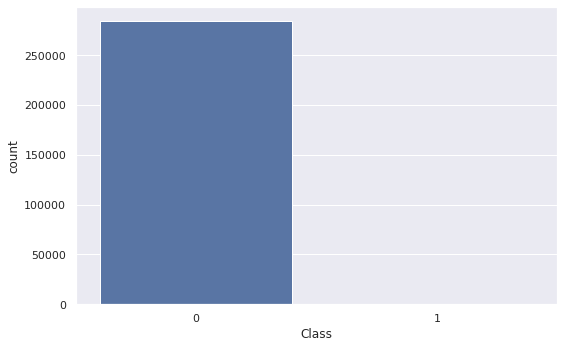

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_theme(style='darkgrid')
sns.countplot(x='Class', data=df)
plt.tight_layout()

Unbalanced data brings some problems in machine learning models.

First, as there is a class that is completely minority in the data set, the machine learning model will have difficulties in noticing its presence when analyzing new observations.

In addition, the evaluation of the project's results will also be difficult. Imagine, for example, a model that says that all observations in the dataset are legitimate, with no fraud occurring. Obviously, such a model is completely useless, as it is not capable of fulfilling the main objective of the problem: detecting credit card fraud. However, if we calculate its accuracy, we would get an incredible 99.83%! This problem wil be handled later.

### Frequency distributions

Now, let's visualize some frequency distributions and compare them for the two avaible classes.



In [ ]:
# creating differente variables for legitimate and fraudulent classes
class_1 = df.loc[df['Class'] == 1]
class_0 = df.loc[df['Class'] == 0]

#### Distribution: ``Time`` variable 

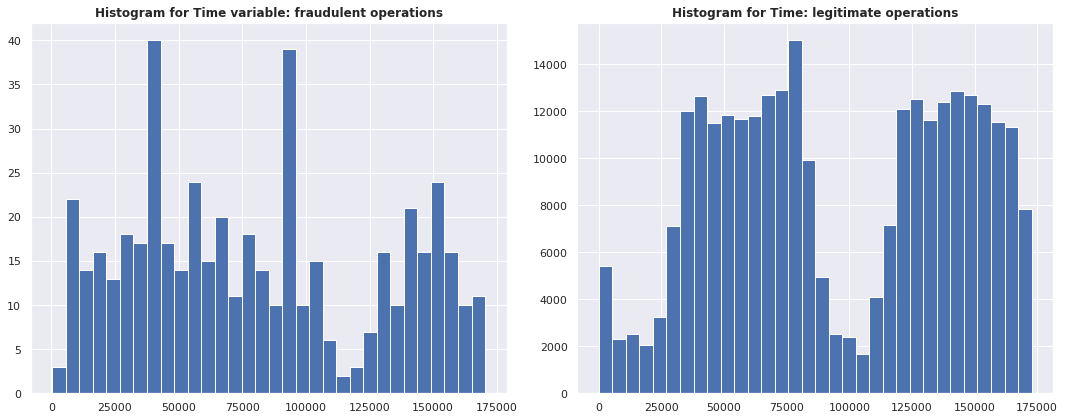

In [ ]:
plot_histogram(class_1, class_0, 'Time')

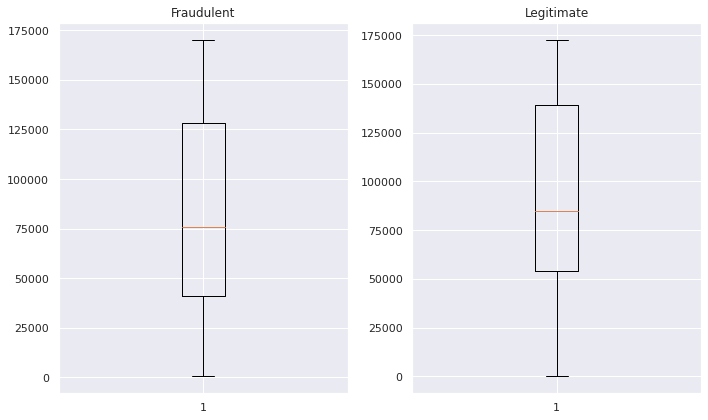

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), ncols=2)
ax1.boxplot(x='Time', data=class_1)
ax1.set_title("Fraudulent")
ax2.boxplot(x='Time', data=class_0)
ax2.set_title('Legitimate')
plt.tight_layout()

#### A few more distributions

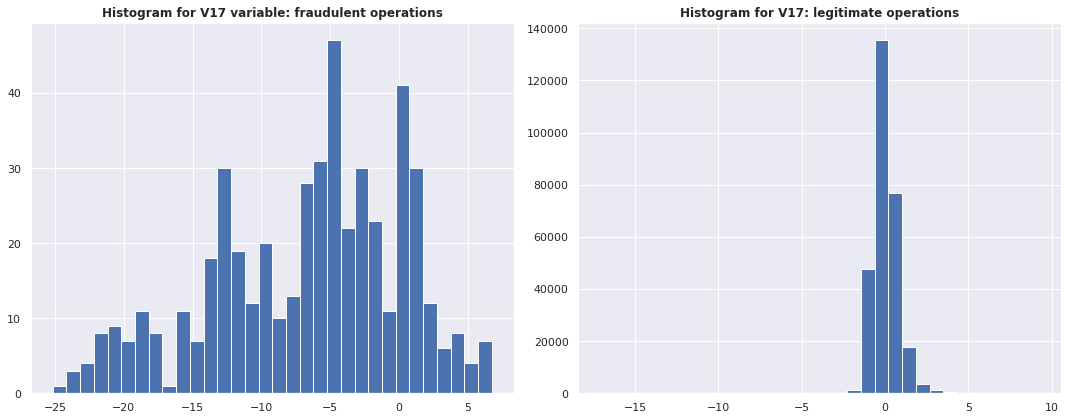

In [ ]:
plot_histogram(class_1, class_0, 'V17')

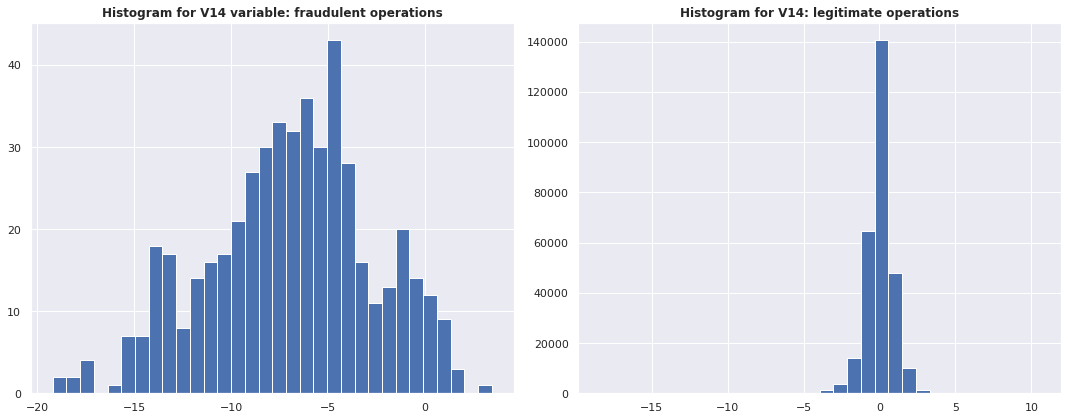

In [ ]:
plot_histogram(class_1, class_0, 'V14')

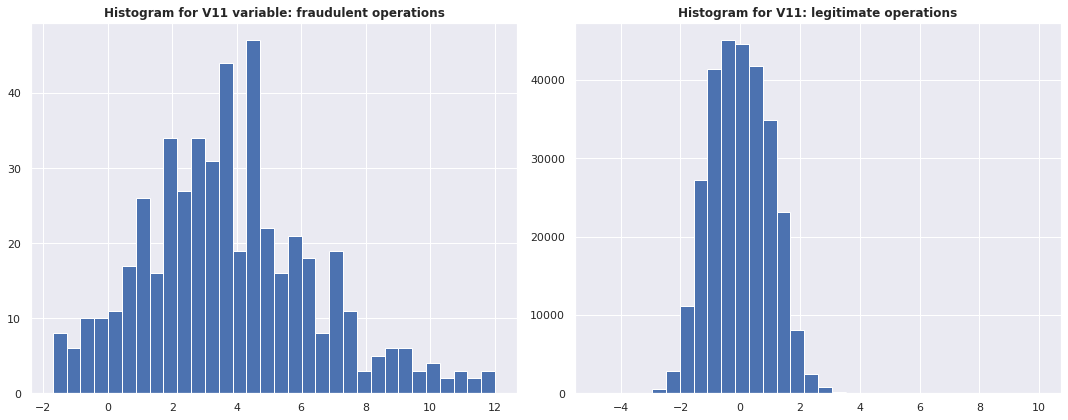

In [ ]:
plot_histogram(class_1, class_0, 'V11')

For these features, we can see a big difference between the distribution of the fraudulent class and the legitimate.

#### Frequency distribution: ``Amount`` variable

Now, let's look at how the amount distributions differ between fraudulent trades and legitimate trades.

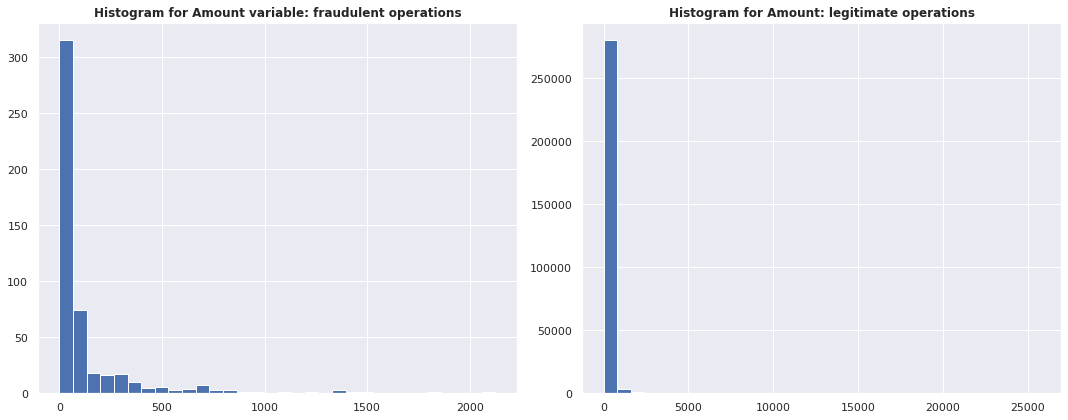

In [ ]:
plot_histogram(class_1, class_0, 'Amount')

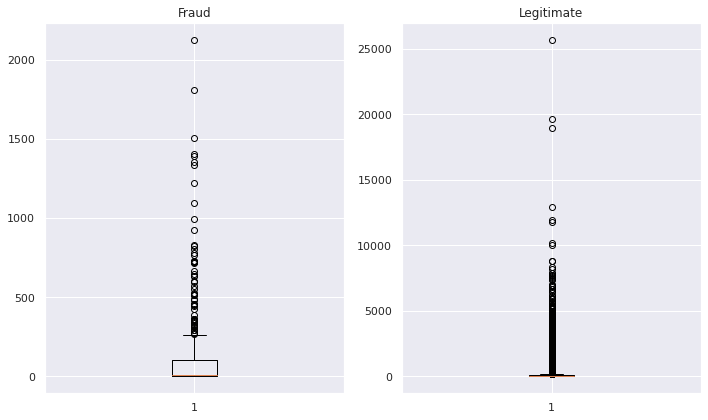

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), ncols=2)
ax1.boxplot(x='Amount', data=class_1)
ax1.set_title('Fraud')
ax2.boxplot(x='Amount', data=class_0)
ax2.set_title("Legitimate")
plt.tight_layout()

### Overview of distributions

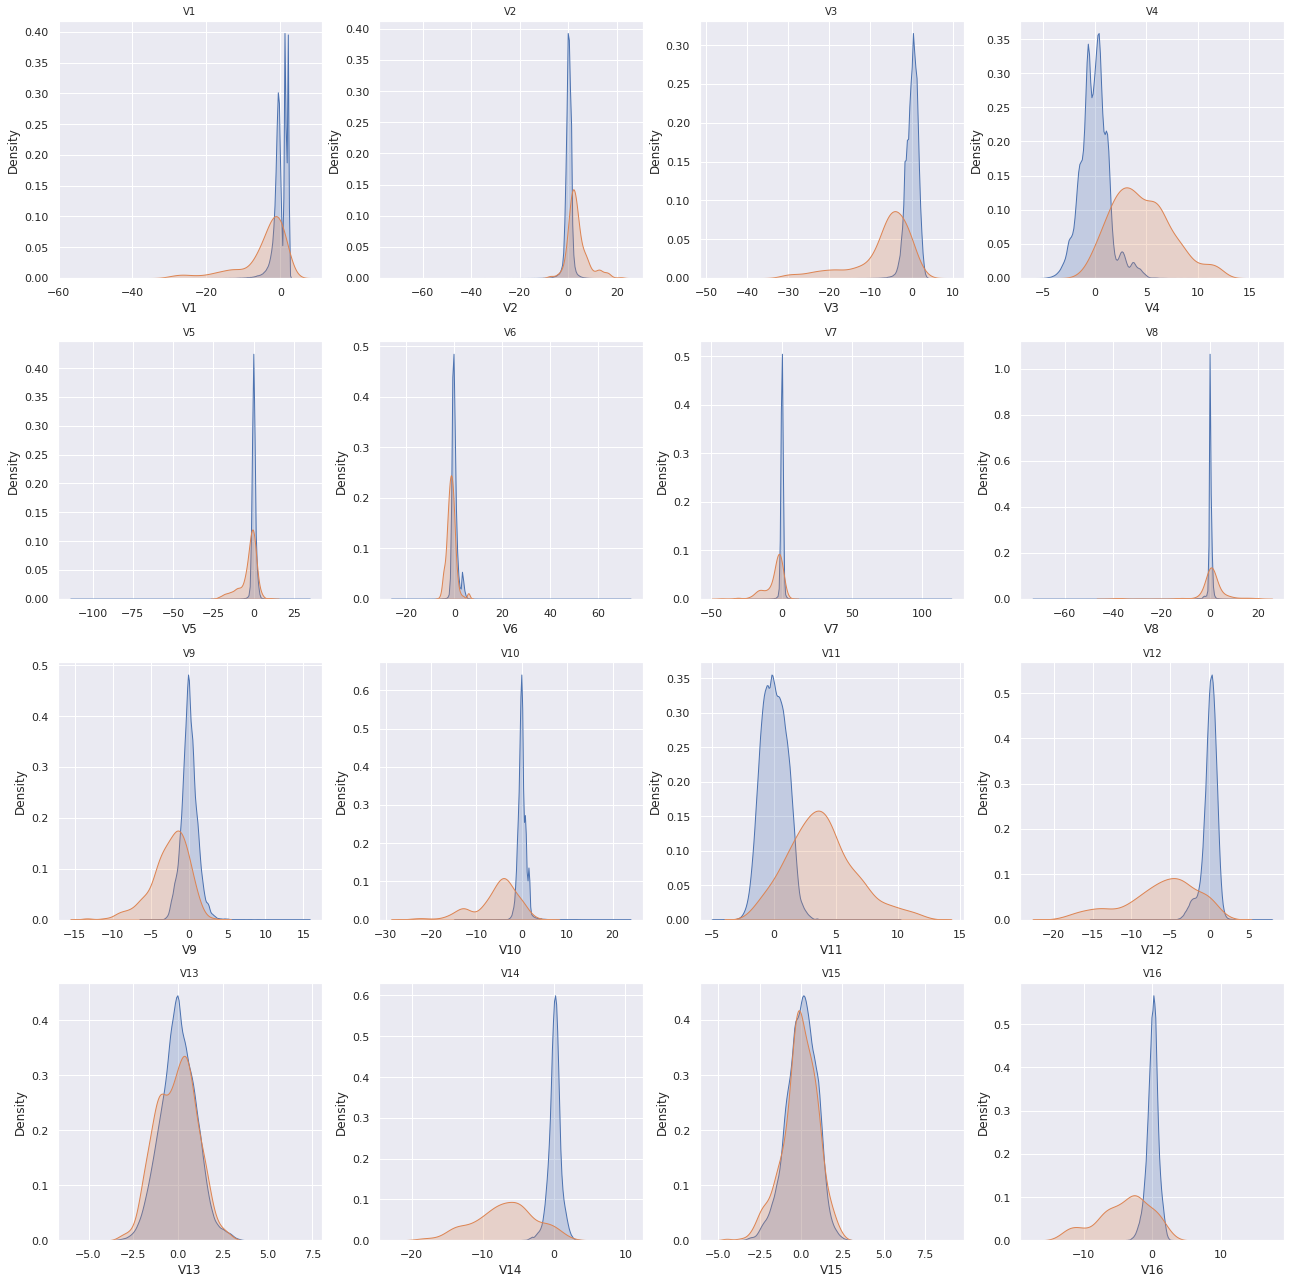

In [ ]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(4, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
    if idx == 16:
      break
plt.tight_layout()

The visualization of the plot is being hampered by some outliers, which are greatly affecting the scale of the visualization. So let's temporarily remove these outliers just to better visualize the distributions.

### Outliers

To identify outliers, we can use the IQR rule, *interquantile range*, which calculates the presence of outliers based on the concept of interquantile range.

We calculate first the first quartile (Q1) (that is, the value for which 25% of the observations of the observed variable are less than it) and then the third quartile (Q3) (the same logic, but applied to the value of 75% ). The difference between these two values is ​​equal to the IQR.

Finally, an observation is considered an outlier if

* Lower than Q1 - 1.5x IQR or

* Higher than Q3 + 1.5 x IQR


Let's see the proportion of the outliers in the dataset.

In [ ]:
# outliers proportion
print(f"Dataset: {round(len(compute_outliers(df, 'Amount')) / len(df) * 100, 2)}%")
print(f"Legitimate: {round(len(compute_outliers(class_0, 'Amount')) / len(class_0) * 100, 2)}%")
print(f"Fraud: {round(len(compute_outliers(class_1, 'Amount')) / len(class_1) * 100, 2)}%")

Dataset: 11.2%
Legitimate: 11.21%
Fraud: 14.02%


In [ ]:
# removing outliers
class_0_corrected = class_0.drop(compute_outliers(class_0, 'Amount').index)
class_1_corrected = class_1.drop(compute_outliers(class_1, 'Amount').index)

Without the outliers, the difference becomes more evident. Legitimate operations seem to follow, in a more pronounced way, a Pareto distribution (of course, the largest available number of observations helps with this, but even if we discount this effect, this difference persists), while fraudulent operations do not.

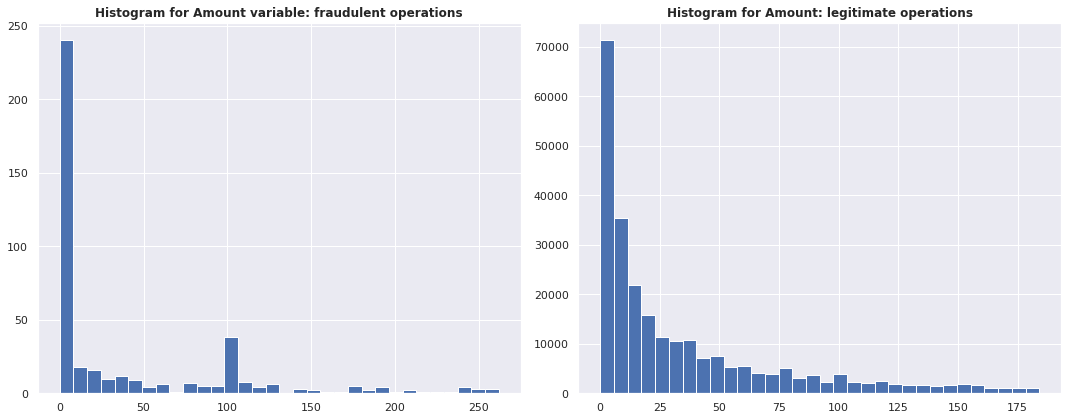

In [ ]:
plot_histogram(class_1 = class_1_corrected, class_0 = class_0_corrected, feature='Amount')

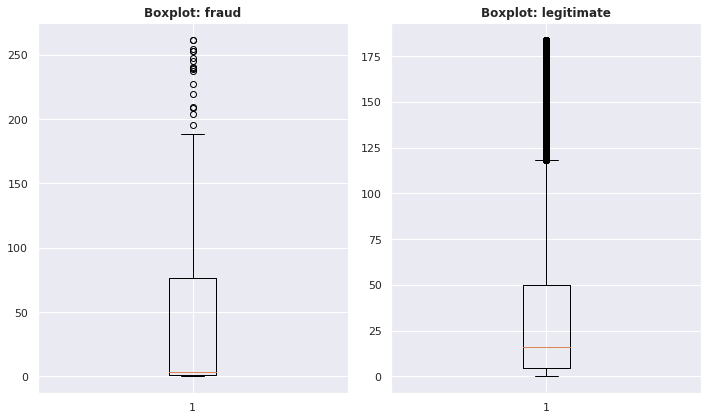

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), ncols=2)
ax1.boxplot(x='Amount', data=class_1_corrected)
ax1.set_title('Boxplot: fraud', weight='bold')
ax2.boxplot(x='Amount', data=class_0_corrected)
ax2.set_title('Boxplot: legitimate', weight='bold')
plt.tight_layout()

### ``Amount`` statistical summary

In [ ]:
print("Legitimate:\n",round(class_0['Amount'].describe(), 2))
print("Fraud:\n", round(class_1['Amount'].describe(), 2))

Legitimate:
 count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64
Fraud:
 count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


As can be seen, the average amount of money spent on fraudulent operations is higher than on legitimate operations. However, the median of legitimate transactions is greater than that of fraudulent ones.

Furthermore, legitimate operations appear to assume more extreme absolute values. While the maximum value for fraudulent operations is 2125, the maximum value for legitimate operations is 25691.

### Removing possible errors

#### Value ​​equal to zero

Let's check the proportion of null observations in ``Amount`` in the dataset, including for each class separately.



In [ ]:
print(df['Amount'].loc[df['Amount'] == 0].count() / df['Amount'].shape[0])

print(class_0['Amount'].loc[class_0['Amount'] == 0].count() / len(class_0))

print(class_1['Amount'].loc[class_1['Amount'] == 0].count() / len(class_1))

0.006407848121710491
0.006323971651161564
0.054878048780487805


We can see that the proportion is small. For fraudulent transactions it is
more significant, since it covers 5% of the observations of this class. Either way, the safest option is to delete these notes, as they likely constitute an error that occurred.

In [ ]:
df = df.loc[df['Amount'] != 0]
class_0 = class_0.loc[class_0['Amount'] != 0]
class_1 = class_1.loc[class_1['Amount'] != 0]

#### Duplicate rows


Another possible common problem in datasets is duplicate observations.

In [ ]:
df.duplicated().astype(int).sum()

1064

There are 1,064 duplicated rows. Therefore, since this is an error, let's remove them as well.

In [ ]:
df = df.drop_duplicates()

### Correlations

We will now analyze and visualize some correlations between the variables. The correlation considered will be the famous Pearson correlation, which seeks to measure the direction and degree of linear correlation that exists between two variables. It encompasses values ​​from -1 to 1. The value 1 means a perfect positive linear correlation, -1 represents a perfect negative correlation, and the value 0 means a zero linear correlation between the variables.

So, let's see a list with the correlation between the explanatory variables and our response variable.

In [ ]:
df_corr = df.corr()
df_corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.145334
V4        0.126041
V2        0.082979
V19       0.035825
V8        0.034943
V21       0.028161
V27       0.021790
V20       0.020028
V28       0.009177
Amount    0.006632
V22       0.005107
V26       0.003791
V25       0.003075
V15      -0.002564
V13      -0.003268
V23      -0.006674
V24      -0.007084
Time     -0.013080
V6       -0.042688
V5       -0.089712
V9       -0.090130
V1       -0.094012
V18      -0.105803
V7       -0.169793
V3       -0.179695
V16      -0.186845
V10      -0.202874
V12      -0.245823
V14      -0.285683
V17      -0.312380
Name: Class, dtype: float64

As can be seen, variable ``V17`` is the one with the highest negative correlation with the class of operations, while ``V11`` is the one with the highest positive correlation.

The ``Amount`` variable, for example, has an almost zero correlation, but that doesn't mean that it isn't important to predict whether a transaction is fraudulent or not, as Pearson's correlation is restricted to *linear* correlations.

### Removing the ``Time`` variable

The ``Time`` variable does not seem to be important to predict the legitimacy or not of the operations, neither from an intuitive point of view nor analyzing its frequency distributions or correlation seen previously. Therefore, we will exclude it from the dataset.

In [ ]:
df = df.drop('Time', axis=1)

## Training and test split

The test set will be set to 20% of the data set, which corresponds to 56384 observations.


In [ ]:
y = df['Class']
X = df.drop('Class', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((225534, 29), (225534,), (56384, 29), (56384,))

In [ ]:
df.Class.loc[df.Class == 0].count() / df.shape[0]

0.9984108854347719

## Data standardization

Now that the data has been split between training and testing, we can standardize it. This step could not be performed earlier because we would have the *data leakage* problem, that is, we would be taking advantage of information in the test data for model training.

All the variables in the dataset are already standardized, only the ``Amount`` variable is missing.

While standardization is not necessary for all machine learning models, it is especially important for distance-based models.

In [ ]:
# scaling the training set
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)


# scaling the test set
X_test = scaler.transform(X_test)

## Evaluation Metrics

Before applying the machine learning methods to the data set, it is necessary to choose which metrics will be used to evaluate the performance of the model results.

As already mentioned, although it is natural to think about accuracy (total model success rate) it is not a good measure of performance for problems with unbalanced classes. Therefore, we will use other performance metrics, which are:

* Precision: within the context of this problem, it seeks to answer the following question: of the times the model detected a possible fraud, in what proportion was it correct, that is, did fraud actually occur?

* Sensitivity (or recall): of the times when there really was fraud, in what proportion was the model able to detect it?

* F1-score: is the harmonic mean between precision and sensitivity.

Looking at the context of the problem, sensitivity is particularly important, as an error measured by it means a case where there was fraud, but it was not detected. This comes at a significant cost to both the company and the customer. An error measured by accuracy, on the other hand, means a case where the model has detected a fraud, but it is a "false alarm". Although this also harms the company and the customer, it is not as serious as the previous case

### Training and Assessment

Now we can actually start building and training the machine learning models. To begin with, let's build two simple models: a logistic regression and a classification tree, without taking into account other issues that would make the models more complex.

#### Um modelo simples

In [ ]:
simple_log = LogisticRegression()

simple_log.fit(X_train, y_train)

simple_log_preds = simple_log.predict(X_test)

classification_metrics(simple_log_preds, y_test)

Accuracy: 0.9992196367763905
Precision: 0.6304347826086957
Recall: 0.8529411764705882
f1_score: 0.725


In [ ]:
simple_tree = DecisionTreeClassifier()

simple_tree.fit(X_train, y_train)

simple_tree_preds = simple_tree.predict(X_test)

classification_metrics(y_test, simple_tree_preds)

Accuracy: 0.9992196367763905
Precision: 0.7608695652173914
Recall: 0.7608695652173914
f1_score: 0.7608695652173914


As can be seen from the results, the logistic regression obtained a superior result regarding the recall metric, while the classification tree obtained a superior precision and f1-score.

#### Data Balancing

As outlined, the imbalance present in the dataset can lead to some problems in the performance of machine learning models. Thus, the solution used for this work was *class weight*. This approach alters the cost function of the model, causing errors in the minority class to be penalized more than errors in the majority. This allows the model to be more sensitive to the presence of minority class observations, improving its performance. The penalty for the minority class ranges from 0 to 1, where 1 represents a model that only cares about errors in that class, while 0 represents a model that only considers errors in the majority class.

Thus, to choose the best possible values ​​for the penalty, a *grid search* was performed, with *Stratified K-Fold* validation, choosing the best *f1_score* possible within the range between 0 and 1.

In [ ]:
model = LogisticRegression()

In [ ]:
weights = np.linspace(0.0, 0.99, 200)

param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

gridsearch = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, scoring='f1').fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Text(0.5, 1.0, 'F1 Score')

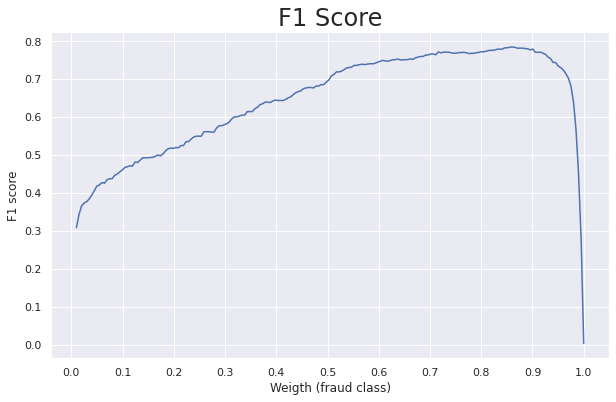

In [ ]:
plt.figure(figsize=(10, 6))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weigth (fraud class)')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('F1 Score', fontsize=24)

From the graph, it is observable that the best possible combination is around 0.9/0.1.

We can now estimate the performance of this model through cross-validation. The performance of all models will be estimated by it, because, as will be detailed later, if there is a big difference between precision and recall, it will be possible to use the existing *tradeoff* between these two metrics.


In [ ]:
lr = LogisticRegression(class_weight = {0: 0.1, 1: 0.9})

In [ ]:
log_reg_validation = cross_validate(estimator = lr, X = X_train, y = y_train, scoring = ['f1', 'precision', 'recall'], cv = StratifiedKFold())

In [ ]:
metrics_cv(log_reg_validation)

fit_time 1.0834531784057617
score_time 0.04499759674072266
test_f1 0.7799882789559696
test_precision 0.7557656196052516
test_recall 0.8062597809076681


#### Training -- logistic regression

Finally, we apply the model to the test set and get the results.

In [ ]:
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

In [ ]:
classification_metrics(y_test, lr_preds)

Accuracy: 0.9992551078320091
Precision: 0.7659574468085106
Recall: 0.782608695652174
f1_score: 0.7741935483870968


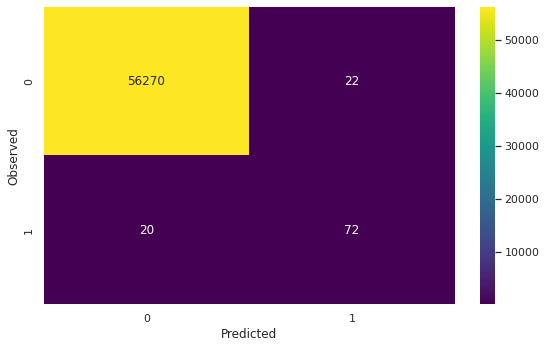

In [ ]:
plot_graph_confusion_matrix(y_test, lr_preds)

## DecisionTree

The second trained model will be a classification tree. The hyperparameters will be left in scikit-learn's default mode.

In [ ]:
tree = DecisionTreeClassifier(random_state=42, class_weight={0: 0.1, 1: 0.9})

In [ ]:
tree_validation = cross_validate(estimator = tree, X = X_train, y = y_train, scoring = ['f1', 'precision', 'recall'], cv = StratifiedKFold())

In [ ]:
metrics_cv(tree_validation)

fit_time 12.478530120849609
score_time 0.029195547103881836
test_f1 0.7448679383001103
test_precision 0.7593240294651585
test_recall 0.7332159624413146


In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=42)

In [ ]:
tree_preds = tree.predict(X_test)

In [ ]:
classification_metrics(y_test, tree_preds)

Accuracy: 0.9992905788876277
Precision: 0.8170731707317073
Recall: 0.7282608695652174
f1_score: 0.7701149425287357


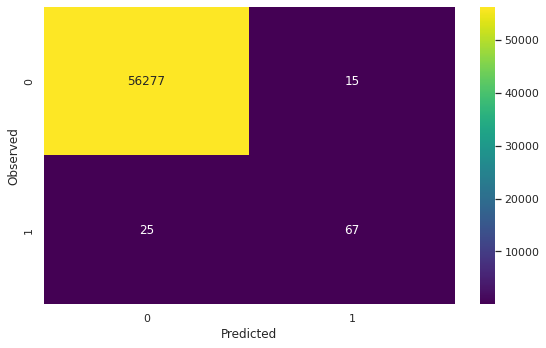

In [ ]:
plot_graph_confusion_matrix(y_test, tree_preds)

The use of class weight did not have a significant impact with the decision tree. The difference in the f1-score is only 1%, but the most important difference is that in this case the precision increased and the recall decreased compared to the model without the use of class weight.


## Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=41, n_estimators=300, class_weight={0: 0.1, 1: 0.9})

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_estimators=300,
                       random_state=41)

In [ ]:
rf_validation = cross_validate(estimator = rf_model, X = X_train, y = y_train, scoring = ['f1', 'precision', 'recall'], cv = StratifiedKFold())

In [ ]:
metrics_cv(rf_validation)

fit_time 427.49692459106444
score_time 1.0884528636932373
test_f1 0.8442187805955033
test_precision 0.9350869722523727
test_recall 0.769640062597809


### Choosing the best threshold

These results show that, for the random forest, there is a big difference between precision and recall. In classification problems, there is a tradeoff between precision and recall: we can change the decision threshold (the threshold for which the model considers an observation as belonging to one class or the other) of the model to increase recall and decrease precision and vice versa.

This is especially useful for problems like this, where one metric has more economic impact than the other. Therefore, from this, a trade-off curve between precision and recall can be constructed that shows the values ​​of these two metrics for different decision thresholds. From it, it is possible to select the best values ​​of these metrics that meet the objective of each particular problem.

This curve is also built using cross validation.

In [ ]:
y_scores_rf = cross_val_predict(rf_model, X_train, y_train, cv=StratifiedKFold(), method='predict_proba')
y_scores_rf = y_scores_rf[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf)

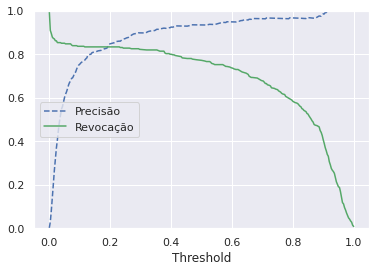

In [ ]:
plot_precision_recall_curve(precisions_rf, recalls_rf, thresholds_rf)

The point where the two curves intersect, i.e. around 0.2, was the chosen point. Even with recall being a more important metric, from this threshold increasing it a little can only be done by making a very large sacrifice in precision, something that is not rewarding.


In [ ]:
rf_prob_preds = rf_model.predict_proba(X_test)

In [ ]:
rf_prob_preds = rf_prob_preds[:, 1]
rf_prob_preds[rf_prob_preds >= 0.2] = 1
rf_prob_preds[rf_prob_preds < 0.2] = 0

#### Results for random forest

In [ ]:
classification_metrics(y_test, rf_prob_preds)

Accuracy: 0.9995211407491487
Precision: 0.8735632183908046
Recall: 0.8260869565217391
f1_score: 0.8491620111731845


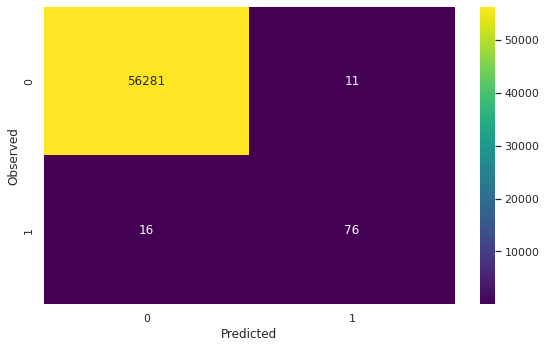

In [ ]:
plot_graph_confusion_matrix(y_test, rf_prob_preds)


## Conclusions

In general, the most complex step within this work was the construction of the machine learning models, especially when taking into account the problems related to the very strong data imbalance. Given this, when comparing the three built models, the one that showed superiority in general aspects was the random forest.

Finally, taking into account aspects such as more complex models or the use of hyperparameter optimization could improve the performance obtained so far with this dataset. 